<a href="https://colab.research.google.com/github/ArcanisX7/projekt_03/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

url = "https://raw.githubusercontent.com/ArcanisX7/projekt_03/main/Country-data.csv"
data = pd.read_csv(url)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [160]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [162]:
x = data.drop("country", axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [163]:
num_data = data.drop('country' , axis =1)
correlation = num_data.corr()
correlation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


**Výsledky korelace**


income / GDP per Capita

Silná pozitivní korelace 0,9 naznačuje, že země s vyššími příjmy mají obecně vyšší HDP na hlavu.


exports / imports

Korelace 0,74 naznačuje, že zvýšený vývoz má tendenci být spojen s vyšší úrovní dovozu v zemích.


child_mort / total_fer

Silná pozitivní korelace 0,85 znamená, že země s vyšší dětskou úmrtností mívají vyšší míru porodnosti.


life_expec / income

Mírná korelace 0,61 znamená, že země s vyšší očekávanou délkou života mívají vyšší úrovně příjmů.


gdpp / total_fer

Korelace -0,45 naznačuje, že vyšší HDP na hlavu bývá spojován s nižší mírou porodnosti.


total_fer / life_expec

Korelace -0,76 ukazuje, že země s vyšší porodností mají obecně nižší střední délku života.


health / child_mort

Velmi slabá korelace -0,2 naznačuje, že mezi zdravotními ukazateli a mírou dětské úmrtnosti existuje malý nebo žádný vztah.

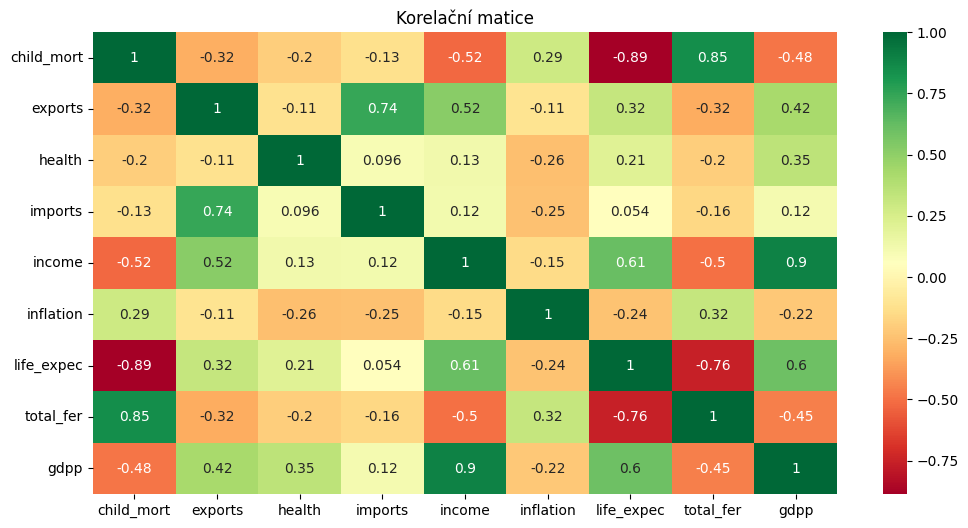

In [164]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True,cmap='RdYlGn')
plt.title('Korelační matice')
plt.show()

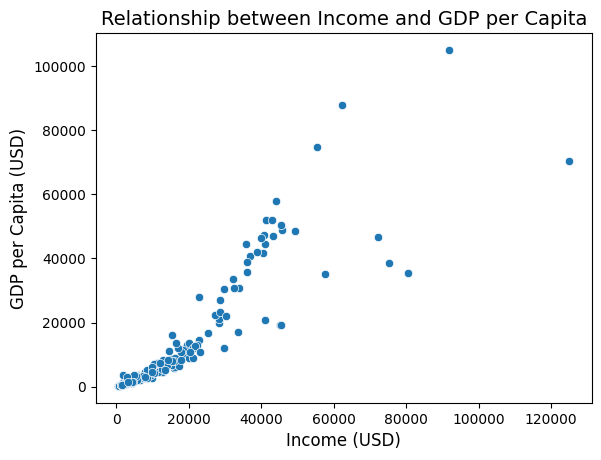

In [165]:
sns.scatterplot(x='income', y='gdpp', data=data)

plt.title('Relationship between Income and GDP per Capita', fontsize=14)
plt.xlabel('Income (USD)', fontsize=12)
plt.ylabel('GDP per Capita (USD)', fontsize=12)

plt.show()


If the correlation coefficient is close to 1 (0.9), it indicates a strong positive relationship. This means that as income increases, GDP per capita is almost certain to increase, reflecting a highly efficient and productive economy.
For instance, in developed countries, the correlation between income and GDP per capita is often very high because of well-established infrastructure, high productivity levels, and advanced industries.

GDP per capita is a useful indicator of a country’s economic health and standard of living. A higher GDP per capita often reflects better infrastructure, better access to services, and generally higher living standards.
As income increases, people are able to contribute more to economic activities, whether through increased consumption, investment, or entrepreneurship, which in turn can increase the overall GDP.

Factors Driving the Correlation:

- Productivity: Higher income often corresponds with increased productivity, which directly contributes to a higher GDP. For example, skilled workers typically earn higher wages, and their productivity is often higher, contributing more to the economy.
- Capital and Investment: Wealthier countries or individuals often have more access to capital, enabling investment in industries, education, infrastructure, and innovation, all of which can boost GDP per capita.
- Consumption: Higher-income individuals generally have more purchasing power, leading to increased consumption of goods and services, which drives economic growth and increases GDP per capita.

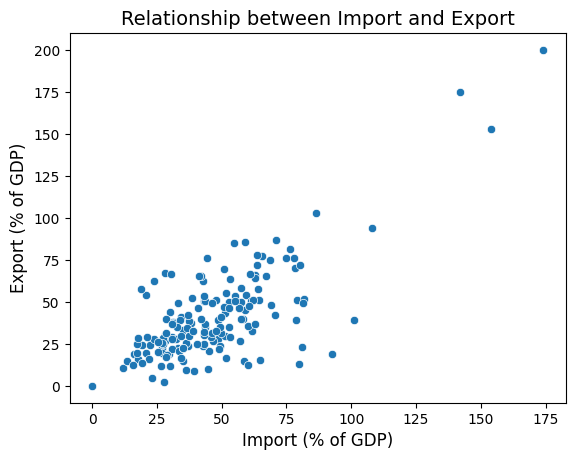

In [ ]:
sns.scatterplot(x='imports', y='exports', data=data)

plt.title('Relationship between Import and Export', fontsize=14)
plt.xlabel('Import (% of GDP)', fontsize=12)
plt.ylabel('Export (% of GDP)', fontsize=12)

plt.show()

In open economies (economies that have fewer restrictions on trade), there is often a positive correlation between higher imports and higher exports. This is because trade in goods and services is often complementary.

Imports and exports are part of the same supply chain. If one country imports raw materials like steel, it may use these inputs to manufacture higher-value finished goods, which are then exported to other countries. Therefore, an increase in imports could lead to an increase in exports as the production capacity increases.

Developed countries or those with strong industrial sectors tend to have higher imports and exports. Countries like the United States, Germany, and China have large export sectors but also import large quantities of goods. Their import levels are high due to their advanced industries and consumption patterns, which require inputs from global markets.
Why Exports and Imports Can Be Linked:
- Complementary Goods: Imports of certain goods, such as machinery or technology, increase a country’s ability to produce high-quality goods for export.
- Increased Consumption and Economic Activity: Higher exports can boost a country’s economic activity, raising domestic incomes and stimulating demand for both domestic and imported goods. When economic conditions are favorable and consumer demand is strong, both imports and exports can rise.
- Exchange Rates: Countries with a strong exchange rate may find it easier to import goods at lower prices while exporting at higher prices. A favorable exchange rate can lead to an increase in both imports and exports.

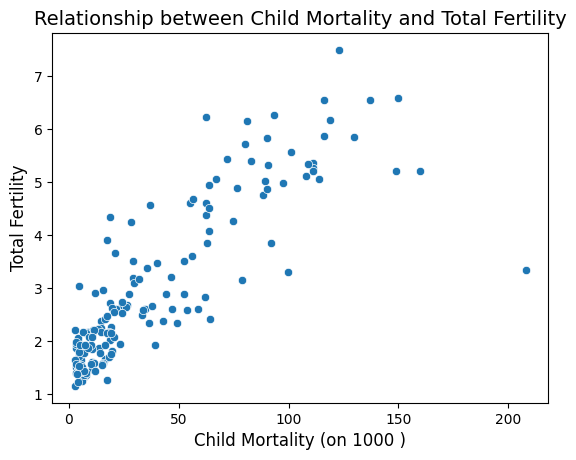

In [167]:
sns.scatterplot(x='child_mort', y='total_fer', data=data)

plt.title('Relationship between Child Mortality and Total Fertility', fontsize=14)
plt.xlabel('Child Mortality (on 1000 )', fontsize=12)
plt.ylabel('Total Fertility', fontsize=12)

plt.show()

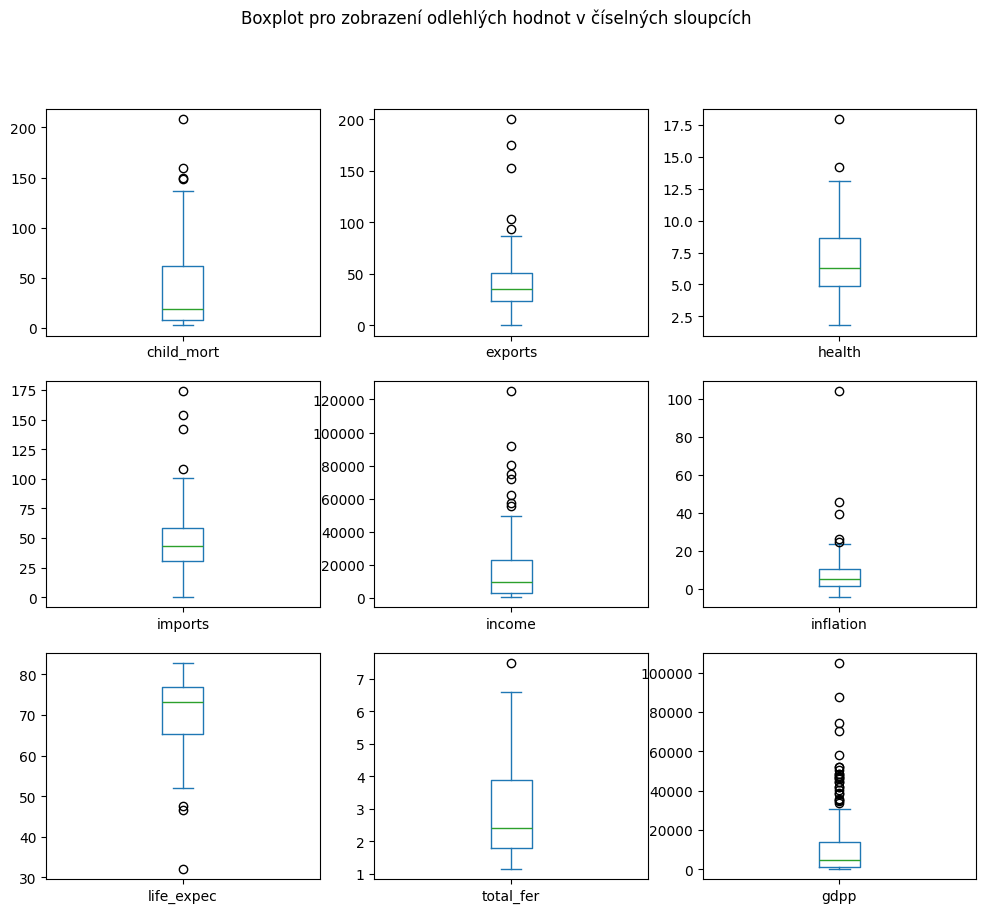

In [168]:
num_data.plot(kind="box", subplots=True, layout=(3,3), figsize=(12, 10))
plt.suptitle("Boxplot pro zobrazení odlehlých hodnot v číselných sloupcích")
plt.show()

In [169]:
for col in num_data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [170]:
sse_list = []
k_range = range(1,21)
for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(x_scaled)
    sse_list.append(k_means.inertia_)

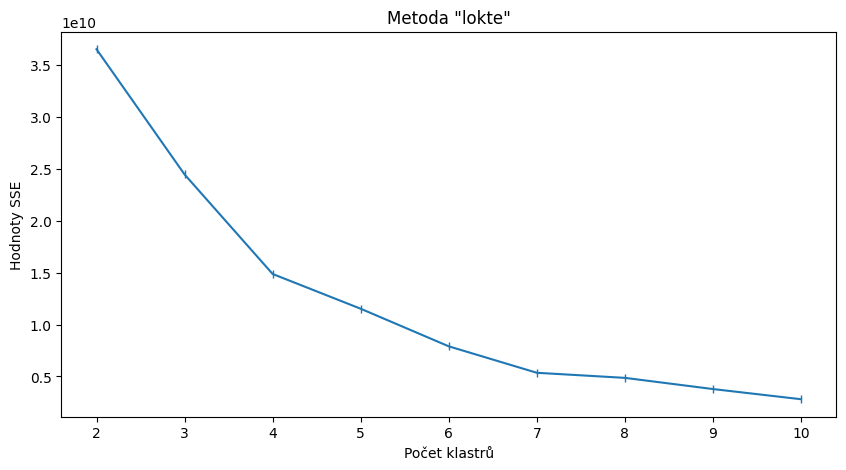

In [171]:
inertia_values = []

for i in range(2,11) :
  model = KMeans(n_clusters=i , random_state=42)
  model.fit(num_data)
  inertia_values.append(model.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2,11), inertia_values , marker='|')

plt.xlabel('Počet klastrů')
plt.ylabel('Hodnoty SSE')
plt.title('Metoda "lokte"')

plt.show()

**K-mean**

In [172]:
kmean = KMeans(n_clusters=4, random_state=42)
kmean.fit(num_data)
labels = kmean.labels_
num_data['Cluster'] = labels
cluster_summary = num_data.groupby('Cluster').mean().T
cluster_summary

Cluster,0,1,2,3
child_mort,54.135185,5.0700,12.102857,4.87500
exports,33.257398,55.1050,52.294286,85.25000
health,6.321574,9.2675,6.845143,7.64000
imports,45.538573,46.9050,49.337143,61.90000
income,6381.138889,47175.0000,25600.000000,83625.00000
inflation,9.204111,2.8907,6.595457,4.21675
life_expec,66.566667,80.3700,76.062857,81.00000
total_fer,3.519815,1.7905,1.976857,1.79250
gdpp,3027.259259,44660.0000,17347.714286,84425.00000


In [173]:
kmeans = KMeans(n_clusters=4, random_state=1)
data['k_means_clusters'] = kmeans.fit_predict(x_scaled)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


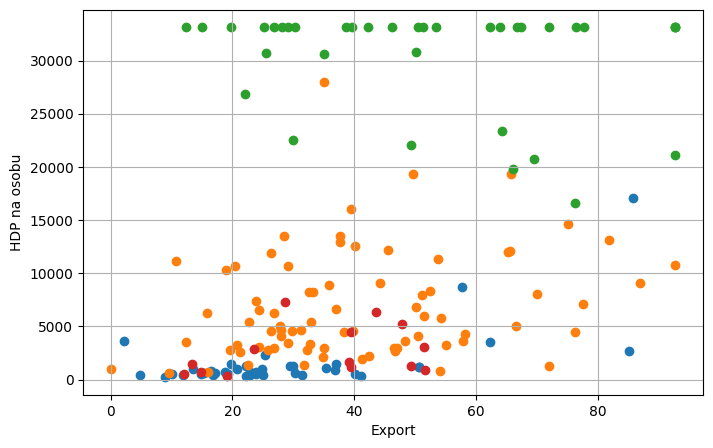

In [174]:
plt.figure(figsize=(8,5))
for cluster in data['k_means_clusters'].unique():
    cluster_data = data[data['k_means_clusters'] == cluster]
    plt.scatter(cluster_data['exports'], cluster_data['gdpp'],
               label=f'Cluster {cluster}')

plt.xlabel('Export')
plt.ylabel('HDP na osobu')
plt.grid()
plt.show()

**Aglomerativní hierarchické shlukování (AHC)**

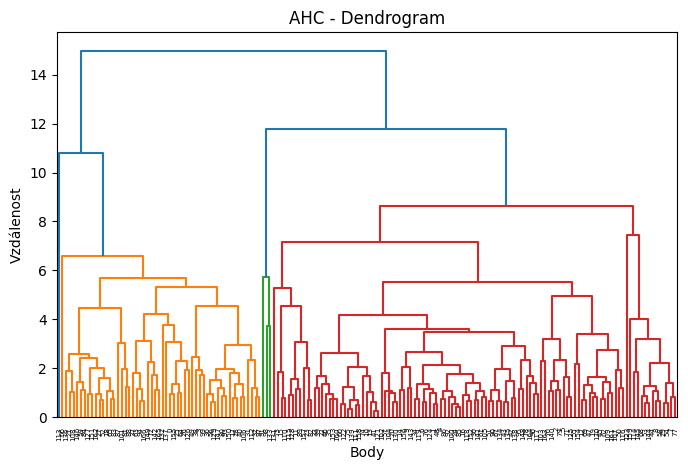

In [175]:
z = linkage(x_scaled, method='complete')
plt.figure(figsize=(8,5))

dendrogram(z)
plt.title('AHC - Dendrogram')
plt.xlabel('Body')
plt.ylabel('Vzdálenost')
plt.show()

**T-SNE (t-Distributed Stochastic Neighbor Embedding)**

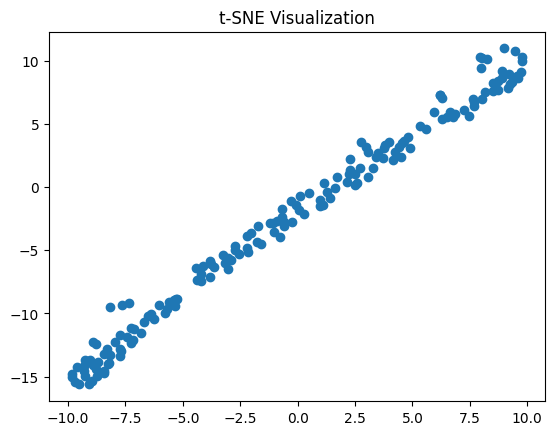

In [176]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(num_data)

import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("t-SNE Visualization")
plt.show()

Distribuce dat:
Data vykazují výraznou lineární strukturu. To naznačuje, že proměnné v původním datasetu mohou být silně korelované.

Clustery: Na základě této vizualizace nevidíme jasné oddělené clustery, což naznačuje, že vaše data pravděpodobně nejsou přirozeně segmentována do diskrétních skupin.

Dimenzionalita: Redukce dimenzionality na 2D zachovala lineární vztahy mezi daty.

**Hlavní komponenty (Principal Component Analysis - PCA)**

In [177]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = num_data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA data shape:", X_pca.shape)

Explained variance ratio: [0.46257655 0.15471654]
PCA data shape: (167, 2)


Explained Variance Ratio udává, kolik procent variability původních dat je zachyceno jednotlivými hlavními komponentami.

První hlavní komponenta zachycuje 46,26 % variability.

Druhá hlavní komponenta zachycuje 15,47 % variability.

Dohromady dvě komponenty zachycují 61,73 % variability.

Toto naznačuje, že použití dvou komponent zredukuje data z původní dimenzionality na dvě hlavní komponenty při zachování více než 60 % informace.

**Výběr na základě korelace promněnných**



In [178]:
abs_corr = correlation.abs()
np.fill_diagonal(abs_corr.values, 0)
largest_corr = abs_corr.unstack().sort_values(ascending=False).head(3)

for idx, value in largest_corr.items():
    print(f"Proměnné: {idx}, Korelace: {value}")




Proměnné: ('income', 'gdpp'), Korelace: 0.895571433087531
Proměnné: ('gdpp', 'income'), Korelace: 0.895571433087531
Proměnné: ('life_expec', 'child_mort'), Korelace: 0.8866760973367771


**Proměnné pro analýzu a vizualizaci:**

child_mort

life_expec

income

In [179]:
top_col_columns = ['child_mort', 'life_expec', 'income']
top_col_data = data[top_col_columns]
top_col_data.head()

,child_mort,life_expec,income
0,90.2,56.2,1610.0
1,16.6,76.3,9930.0
2,27.3,76.5,12900.0
3,119.0,60.1,5900.0
4,10.3,76.8,19100.0


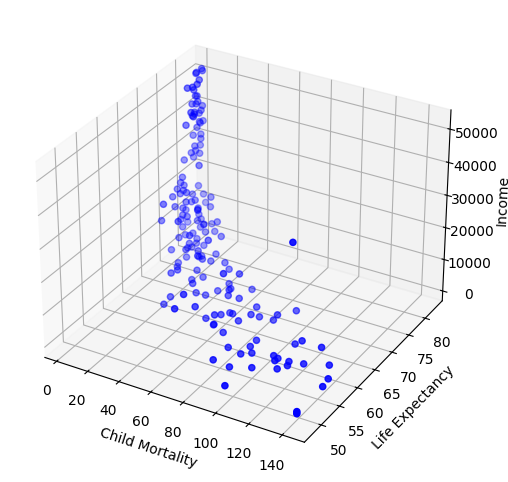

In [180]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    top_col_data['child_mort'],
    top_col_data['life_expec'],
    top_col_data['income'],
    c='b', marker='o'
)

ax.set_xlabel("Child Mortality")
ax.set_ylabel("Life Expectancy")
ax.set_zlabel("Income")

plt.show()

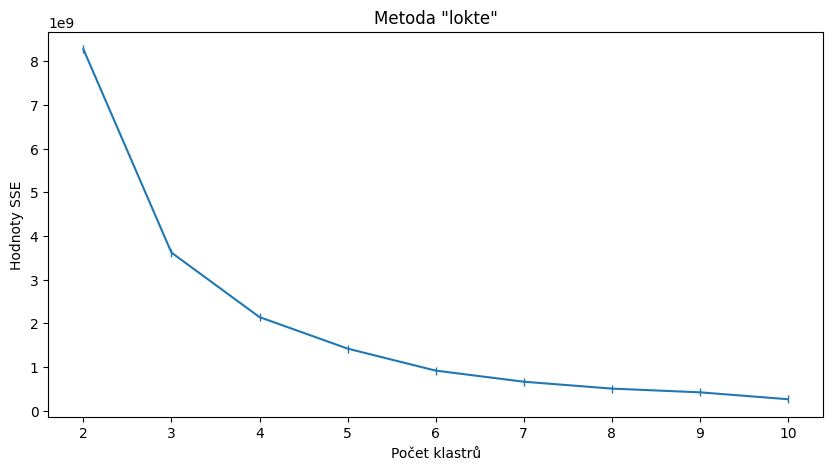

In [181]:
sse_list2 = []
k_range = range(1,21)
for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(x_scaled)
    sse_list.append(k_means.inertia_)

inertia_values2 = []

for i in range(2,11) :
  model = KMeans(n_clusters=i , random_state=42)
  model.fit(top_col_data)
  inertia_values2.append(model.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2,11), inertia_values2 , marker='|')

plt.xlabel('Počet klastrů')
plt.ylabel('Hodnoty SSE')
plt.title('Metoda "lokte"')

plt.show()

In [182]:
sse_valuesx = []

cluster_options = [3, 4, 5]

for k in cluster_options:
    kmean = KMeans(n_clusters=k, random_state=42)
    kmean.fit(top_col_data[['child_mort', 'life_expec', 'income']])
    sse_valuesx.append((k, kmean.inertia_))

for k, sse in sse_valuesx:
    print(f"Počet klastrů: {k}, SSE: {sse}")

Počet klastrů: 3, SSE: 3618024346.849087
Počet klastrů: 4, SSE: 2140586368.4014723
Počet klastrů: 5, SSE: 1419078981.1002657


In [152]:
kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(top_col_data)
labels = kmean.labels_
top_col_data.loc[:, 'Cluster'] = labels
cluster_summary = top_col_data.groupby('Cluster').mean().T
cluster_summary

Cluster,0,1,2,3,4
child_mort,61.991860,6.733333,9.063333,5.9,17.109302
life_expec,65.155814,79.616667,79.300000,80.4,73.532558
income,4463.523256,67216.666667,37526.666667,108350.0,17058.139535


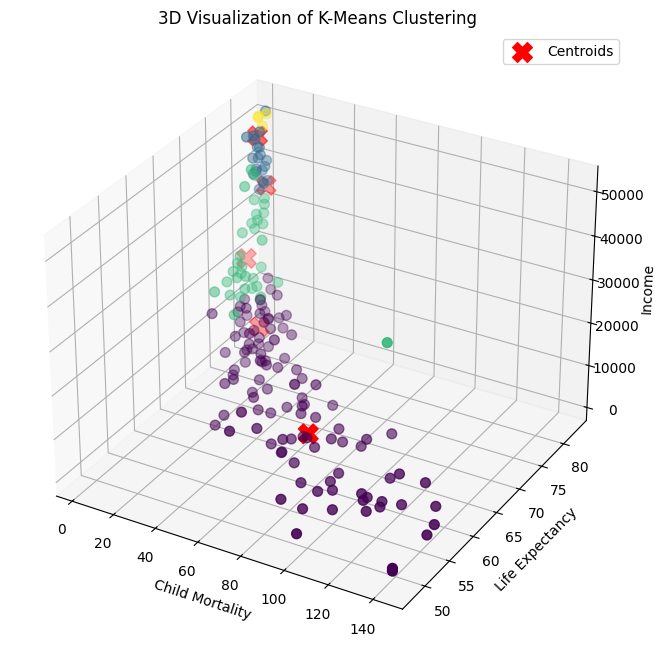

In [183]:
top_col_data = pd.DataFrame(data)

centroids = kmean.cluster_centers_

top_col_data['Cluster'] = labels

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    top_col_data['child_mort'],
    top_col_data['life_expec'],
    top_col_data['income'],
    c=top_col_data['Cluster'], cmap='viridis', s=50
)

ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='red', marker='X', s=200, label='Centroids'
)

ax.set_xlabel("Child Mortality")
ax.set_ylabel("Life Expectancy")
ax.set_zlabel("Income")
ax.set_title("3D Visualization of K-Means Clustering")

plt.legend()
plt.show()

In [184]:
centroids_df = pd.DataFrame(
    centroids[:, :3],
    columns=['child_mort', 'life_expec', 'income']
)

fig = px.scatter_3d(
    top_col_data,
    x='child_mort',
    y='life_expec',
    z='income',
    color='Cluster',
    title="Interactive 3D K-Means Clustering",
    labels={
        'child_mort': 'Child Mortality',
        'life_expec': 'Life Expectancy',
        'income': 'Income'
    }
)

fig.add_scatter3d(
    x=centroids_df['child_mort'],
    y=centroids_df['life_expec'],
    z=centroids_df['income'],
    mode='markers',
    marker=dict(color='red', size=5, symbol='x'),
    name='Centroids'
)

fig.show()